In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Iris(1).csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape #attribute

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

C:\Users\KIIT\AppData\Local\Temp\ipykernel_20000\3079842410.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


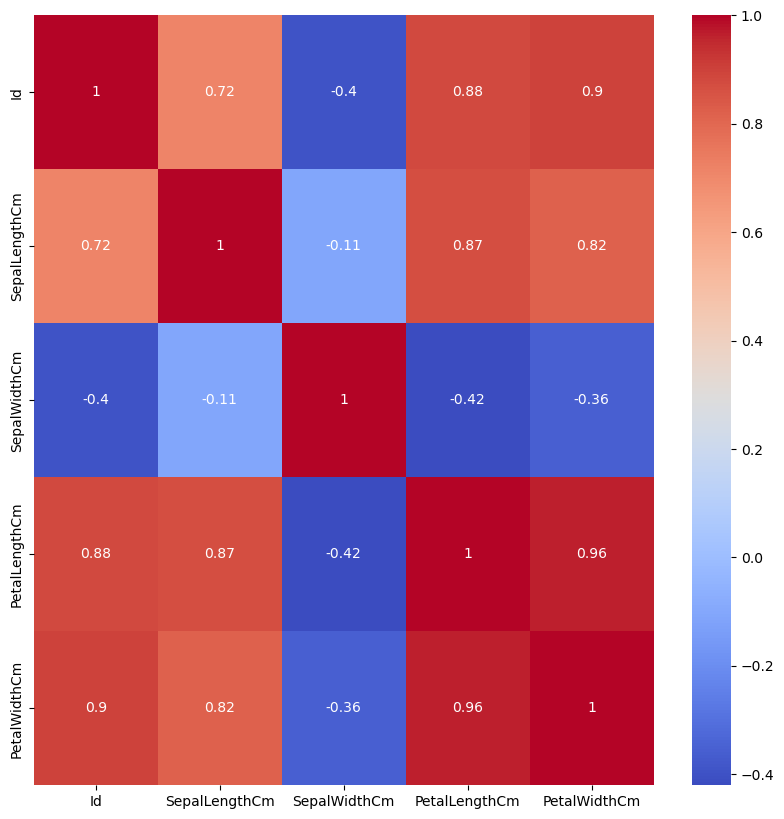

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [9]:
df.keys()  

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<Axes: >

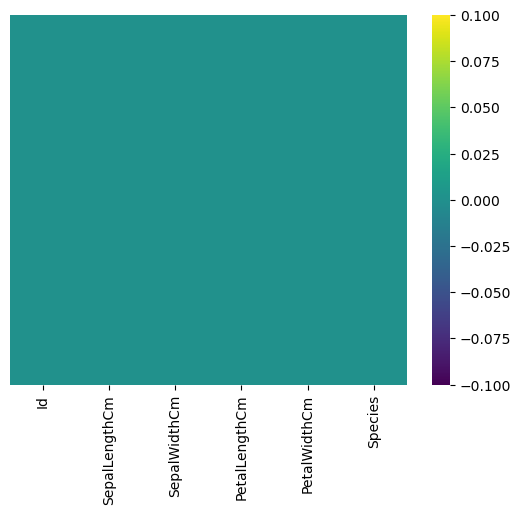

In [10]:
sns.heatmap(df.isnull(),yticklabels = False,cbar=True, cmap='viridis')

In [11]:
df=df.drop(['Id'], axis=1)

In [12]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


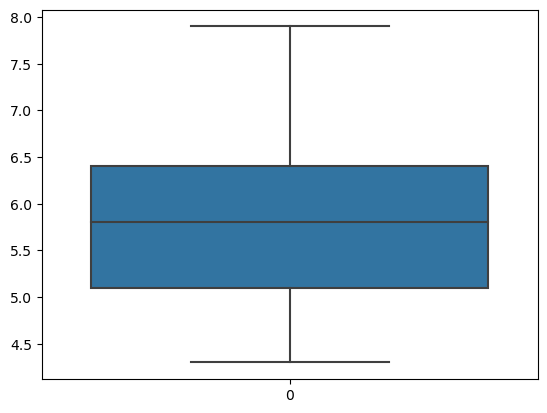

In [13]:
sns.boxplot(df['SepalLengthCm'])
plt.show()

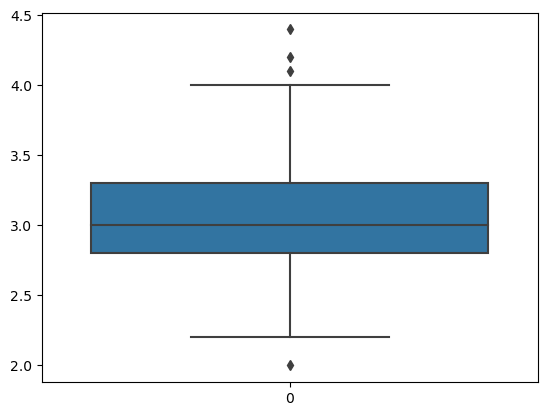

In [14]:
sns.boxplot(df['SepalWidthCm'])
plt.show()

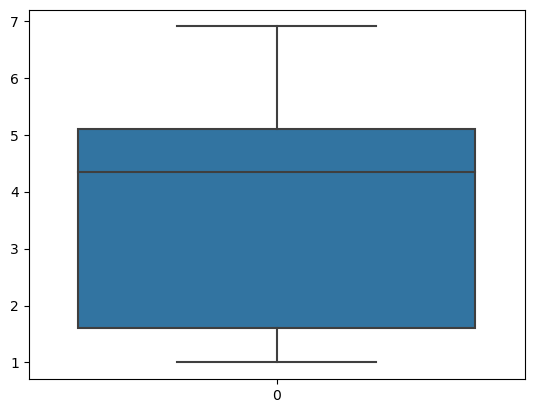

In [15]:
sns.boxplot(df['PetalLengthCm'])
plt.show()

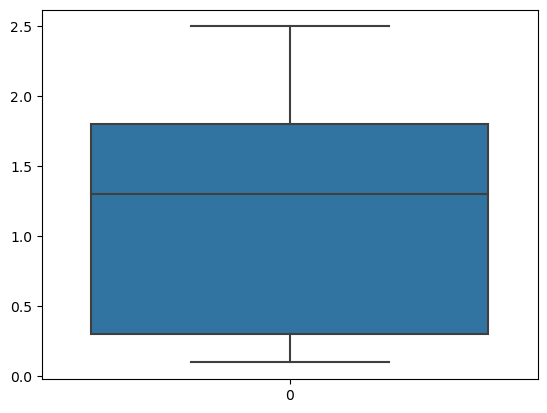

In [16]:
sns.boxplot(df['PetalWidthCm'])
plt.show()

In [17]:
# z score : to detect outliers
# defines how many standard deviantions away is the mean
df['zscore']=((df.SepalWidthCm - df.SepalWidthCm.mean())/df.SepalWidthCm.std())
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,zscore
0,5.1,3.5,1.4,0.2,Iris-setosa,1.028611
1,4.9,3.0,1.4,0.2,Iris-setosa,-0.124540
2,4.7,3.2,1.3,0.2,Iris-setosa,0.336720
3,4.6,3.1,1.5,0.2,Iris-setosa,0.106090
4,5.0,3.6,1.4,0.2,Iris-setosa,1.259242


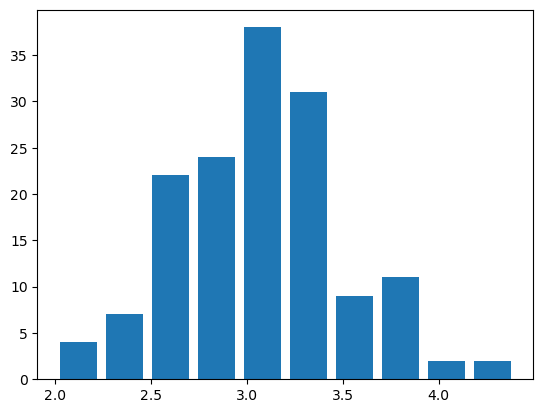

In [18]:
plt.hist(df.SepalWidthCm,bins=10,rwidth=0.8)
plt.xlabel('')
plt.ylabel('')
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_20000\957039501.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


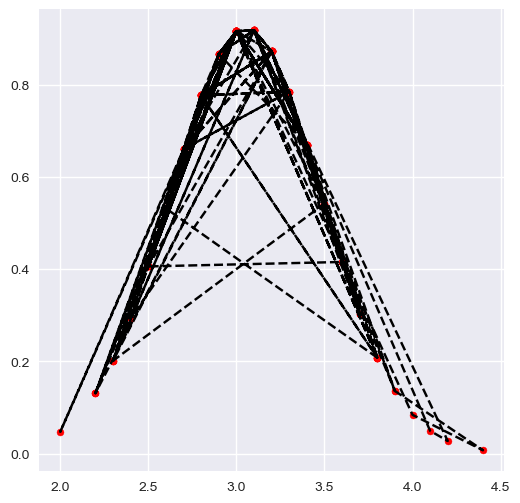

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def pdf(x):
	mean = np.mean(x)
	std = np.std(x)
	y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))
	return y_out
	
# To generate an array of x-values
x = df['SepalWidthCm']
# To generate an array of
# y-values using corresponding x-values
y = pdf(x)

# Plotting the bell-shaped curve
plt.style.use('seaborn')
plt.figure(figsize = (6, 6))
plt.plot(x, y, color = 'black',
		linestyle = 'dashed')

plt.scatter( x, y, marker = 'o', s = 25, color = 'red')
plt.show()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20000\3696711535.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


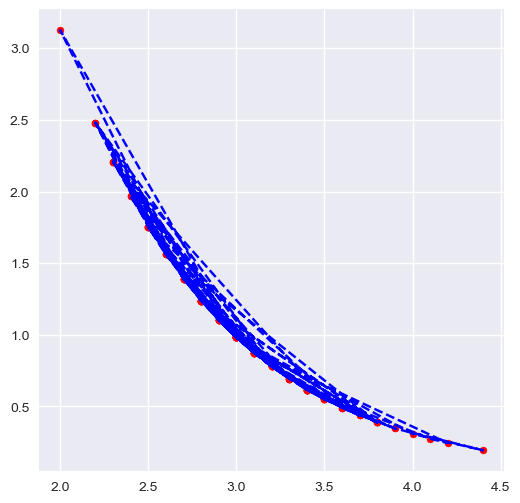

In [20]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

# A custom function to calculate
# probability distribution function
def pdf(x):
	mean = np.mean(x)
	std = np.std(x)
	y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)*2 / (2 * std*2))
	return y_out
	
# To generate an array of x-values
x = df['SepalWidthCm']

# To generate an array of
# y-values using corresponding x-values
y = pdf(x)

# Plotting the bell-shaped curve
plt.style.use('seaborn')
plt.figure(figsize = (6, 6))
plt.plot(x, y, color = 'blue',
		linestyle = 'dashed')

plt.scatter( x, y, marker = 'o', s = 25, color = 'red')
plt.show()

In [21]:
print("The outliers are : ")
df[(df.zscore<-2) | (df.zscore>2)]

The outliers are : 


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,zscore
14,5.8,4.0,1.2,0.2,Iris-setosa,2.181763
15,5.7,4.4,1.5,0.4,Iris-setosa,3.104284
32,5.2,4.1,1.5,0.1,Iris-setosa,2.412393
33,5.5,4.2,1.4,0.2,Iris-setosa,2.643024
60,5.0,2.0,3.5,1.0,Iris-versicolor,-2.430844


In [22]:
df1 = df[(df.zscore>-2) & (df.zscore<2)]
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,zscore
0,5.1,3.5,1.4,0.2,Iris-setosa,1.028611
1,4.9,3.0,1.4,0.2,Iris-setosa,-0.124540
2,4.7,3.2,1.3,0.2,Iris-setosa,0.336720
3,4.6,3.1,1.5,0.2,Iris-setosa,0.106090
4,5.0,3.6,1.4,0.2,Iris-setosa,1.259242
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,-0.124540
146,6.3,2.5,5.0,1.9,Iris-virginica,-1.277692
147,6.5,3.0,5.2,2.0,Iris-virginica,-0.124540
148,6.2,3.4,5.4,2.3,Iris-virginica,0.797981


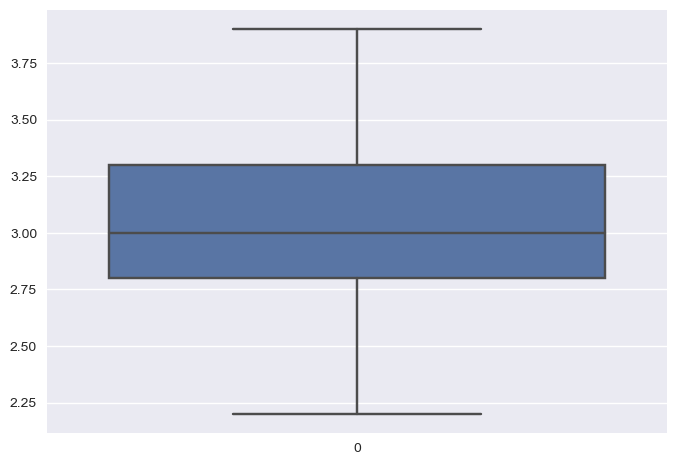

In [23]:
sns.boxplot(df1['SepalWidthCm'])
plt.show()

In [24]:
df1.groupby('Species').size()

Species
Iris-setosa        46
Iris-versicolor    49
Iris-virginica     50
dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
label_encoder=LabelEncoder()
df1['Species']=label_encoder.fit_transform(df1['Species'])
df1

C:\Users\KIIT\AppData\Local\Temp\ipykernel_20000\2692706230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Species']=label_encoder.fit_transform(df1['Species'])


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,zscore
0,5.1,3.5,1.4,0.2,0,1.028611
1,4.9,3.0,1.4,0.2,0,-0.124540
2,4.7,3.2,1.3,0.2,0,0.336720
3,4.6,3.1,1.5,0.2,0,0.106090
4,5.0,3.6,1.4,0.2,0,1.259242
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,-0.124540
146,6.3,2.5,5.0,1.9,2,-1.277692
147,6.5,3.0,5.2,2.0,2,-0.124540
148,6.2,3.4,5.4,2.3,2,0.797981


<Axes: >

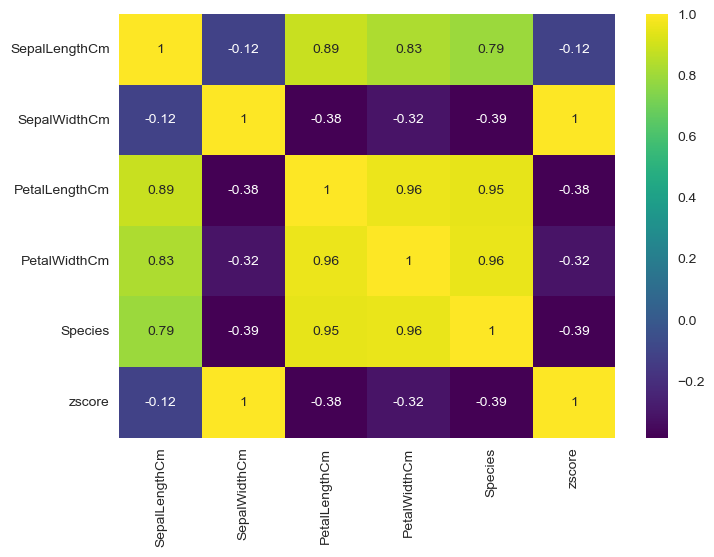

In [27]:
sns.heatmap(df1.corr(),yticklabels=True,cbar=True,cmap='viridis',annot=True)

In [28]:
feature_columns = (['SepalLengthCm','PetalLengthCm','PetalWidthCm'])
X = df1[feature_columns].values
Y = df1['Species'].values
X

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [4.9, 1.5, 0.1],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.5, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3, 0.3],
       [4.4, 1.3, 0.2],
       [5. , 1.6, 0.6],
       [5.1, 1.9, 0.4],
       [4.8, 1.4

In [29]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 10)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5) #k=5
#fit the classifier in the dataset
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [32]:
knn.predict(x_test)[0:5]

array([2, 1, 2, 2, 1])

In [33]:
knn.score(x_test, y_test)

1.0

GridSearchCV

In [34]:
# finding the best value of k
from sklearn.model_selection import GridSearchCV

#creating a new knn model
knn2 = KNeighborsClassifier()

#Creating a dictionary to store the value of k
param_grid = {"n_neighbors": np.arange(1,30)}

knn_gscv = GridSearchCV(knn2, param_grid, cv=11)#cv = 5 - cross validation, 5 folds mai divide hone ke baad each fold ko train karega
#fit the model
knn_gscv.fit(X,Y)

GridSearchCV(cv=11, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [35]:
knn_gscv.best_params_

{'n_neighbors': 23}

In [36]:
knn_gscv.best_score_

0.9795204795204796